# Beamforming - Contre-mesures RADAR

## Situation

### Maxime BARRET


Avec l'aide de :
#### 'Signaux et Sytèmes' - Prof. Dr Ir Xavier Neyt 
#### 'Source Localization with sensor arrays' - Assistant Professors Charles Vanwynsberghe & Angélique Drémeau


### Les deux notebooks précédents illustrent respectivement : 
- L'estimation de la direction d'arrivée d'un signal et la comparaison de différentes méthodes (Justesse, faux-positif, non-détection, robustesse de la méthode au mouvement)
- La mise en place d'une situation s'approchant de la réalité et introduire le principe d'émission dans une certaine direction. 

### Le but est à présent de mettre en place une situation combinant les deux
c.f. Mail du 13 Août 2020

Nous aurons un système allié, et deux systèmes ennemis. 
Les deux systèmes ennemis envoient chacun un signal ($s1$ et $s2$ respectivement), ces signaux étant correllés.
Au niveau de notre système allié, nous recevons $s0$. 
Par rapport au système allié, les deux ennemis sont respectivement à $ \theta_0 $ et $ \theta_1 $.


In [55]:
%matplotlib notebook
from BeamformingMethods import a
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd     
from scipy.signal import find_peaks
import time as t
import warnings
import scipy

#Imports d'usage

In [136]:
N=5   #J'ai N éléments dans mon ULA
l=0.3  #longueur d'onde
d = l/2 #distance entre mes antennes élémentaires

s=[]
for a in range(N):
    if a%2==0:
        s.append(-1)
    else:
        s.append(1)
#s=[np.exp(1j*np.pi*j) for j in range(N) ]

theta1 = 20/180*np.pi   #Angle où sont situés deux sources, en rad
theta2 = 40/180*np.pi

dphi1 = 2*np.pi*d*np.sin(theta1)/l   #Déphasage induit par l'AoA 
dphi2 = 2*np.pi*d*np.sin(theta2)/l

theta = np.linspace(-np.pi/2,np.pi/2,181)   #Grille d'angle

n = np.arange(0,N,1)  #Correspond à la 'liste' de nos antennes élémentaires

s1 = np.exp(1j*dphi1*n)  
s2 = np.exp(1j*dphi2*n)  

R = np.zeros((N,N))
K = 1000
for k in range(K):
    
    
    a1 = 4*np.exp(1j*k*l) #Je créé les coefficients de mes signaux, de telle sorte à ce qu'ils soient corrélés.
    a2 = 4*np.exp(1j*(k*l + np.pi))
    
    #a1 = 2*rd.random(1) + 1j * 2*rd.random(1);    #Comme le code matlab, mais les signaux ne seront pas corrélés.
    #a2 = 2*rd.random(1) + 1j * 2*rd.random(1);
    
    nn = a1*s1*s1.T +a2*s2*s2.T + 0.001*(rd.randn(N,1)+1j*rd.randn(N,1))
    nn +=  s1.T*s2 + s2*s1.T  #car signaux corrélés
    R = R + nn.T@nn
    
R=R/K


y = s + s1 + s2

In [137]:
T=[]
SNR = []
for i in theta:
    dphi = 2*np.pi*d*np.sin(i)/l
    steer = np.exp(1j*dphi*n)
    R_inv = np.linalg.inv(R)
    w = R_inv@s
    T.append(abs(w.T@y)**2)
    SNR.append(steer.T@R_inv@steer)

<IPython.core.display.Javascript object>


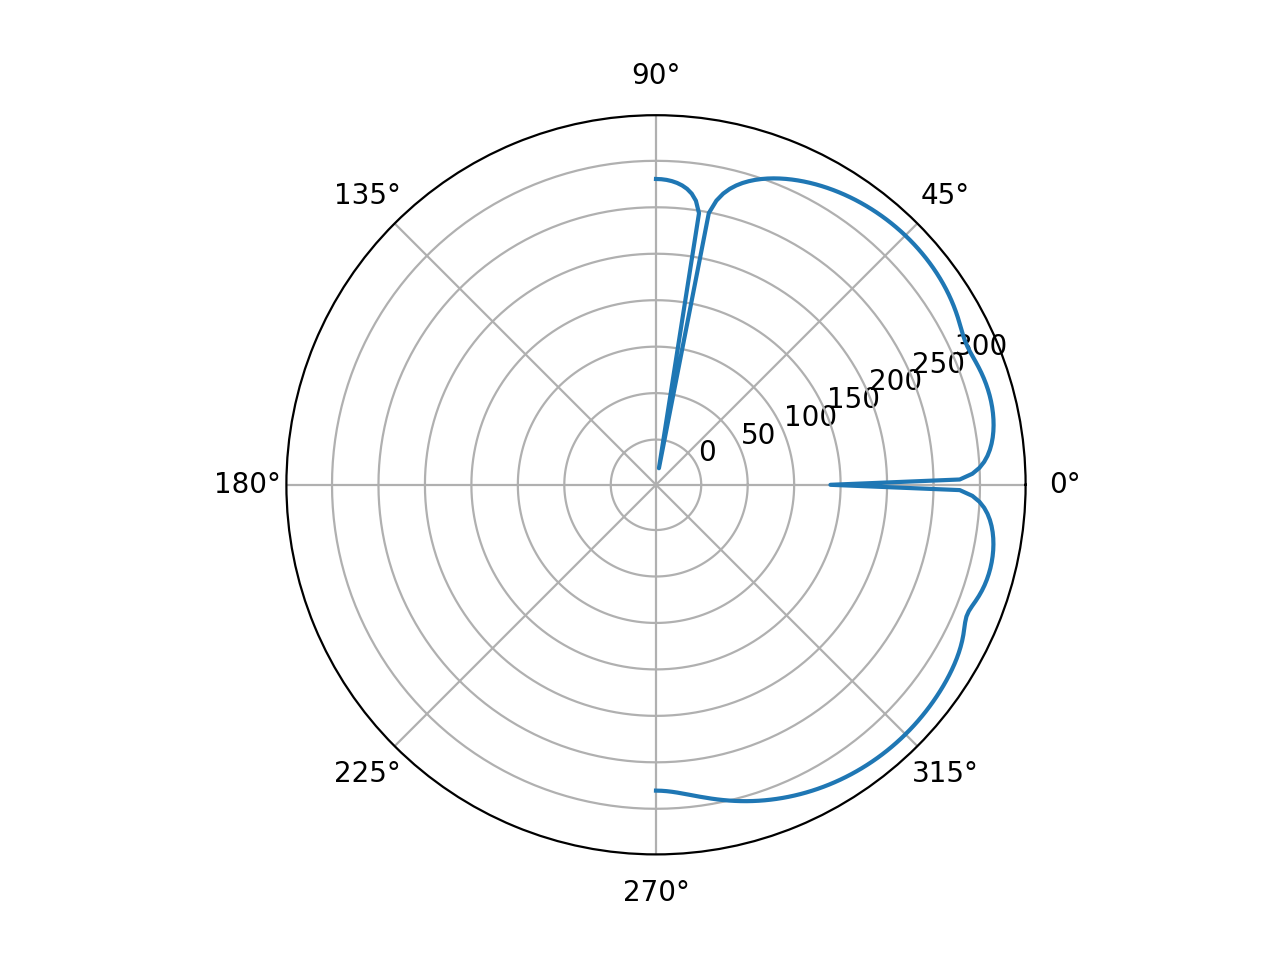

In [138]:
plt.figure()
plt.polar(theta,10*np.log(SNR))

<IPython.core.display.Javascript object>


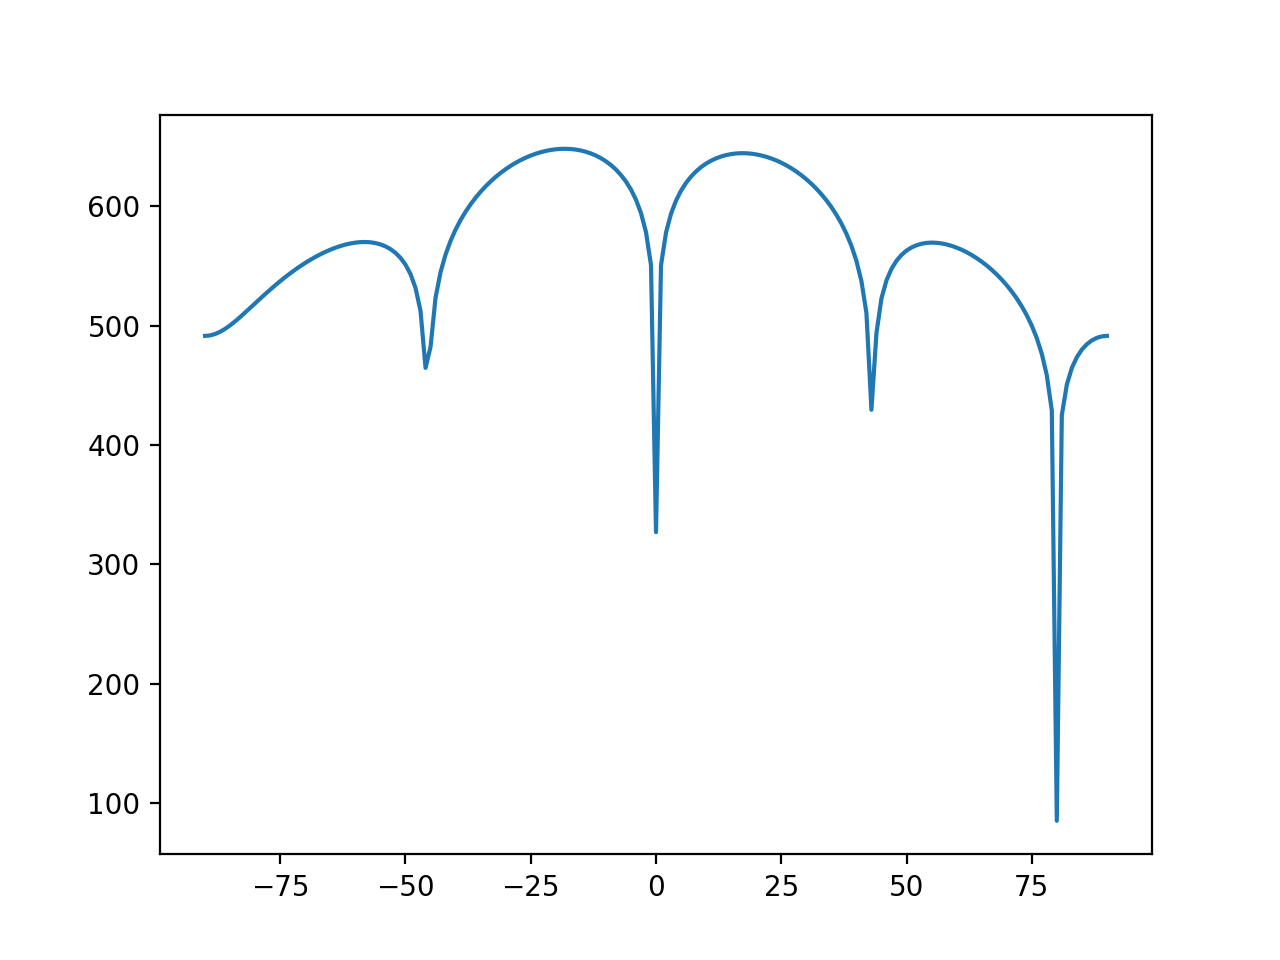

In [135]:
plt.figure()
plt.plot(180*theta/np.pi,20*np.log(SNR))

<IPython.core.display.Javascript object>


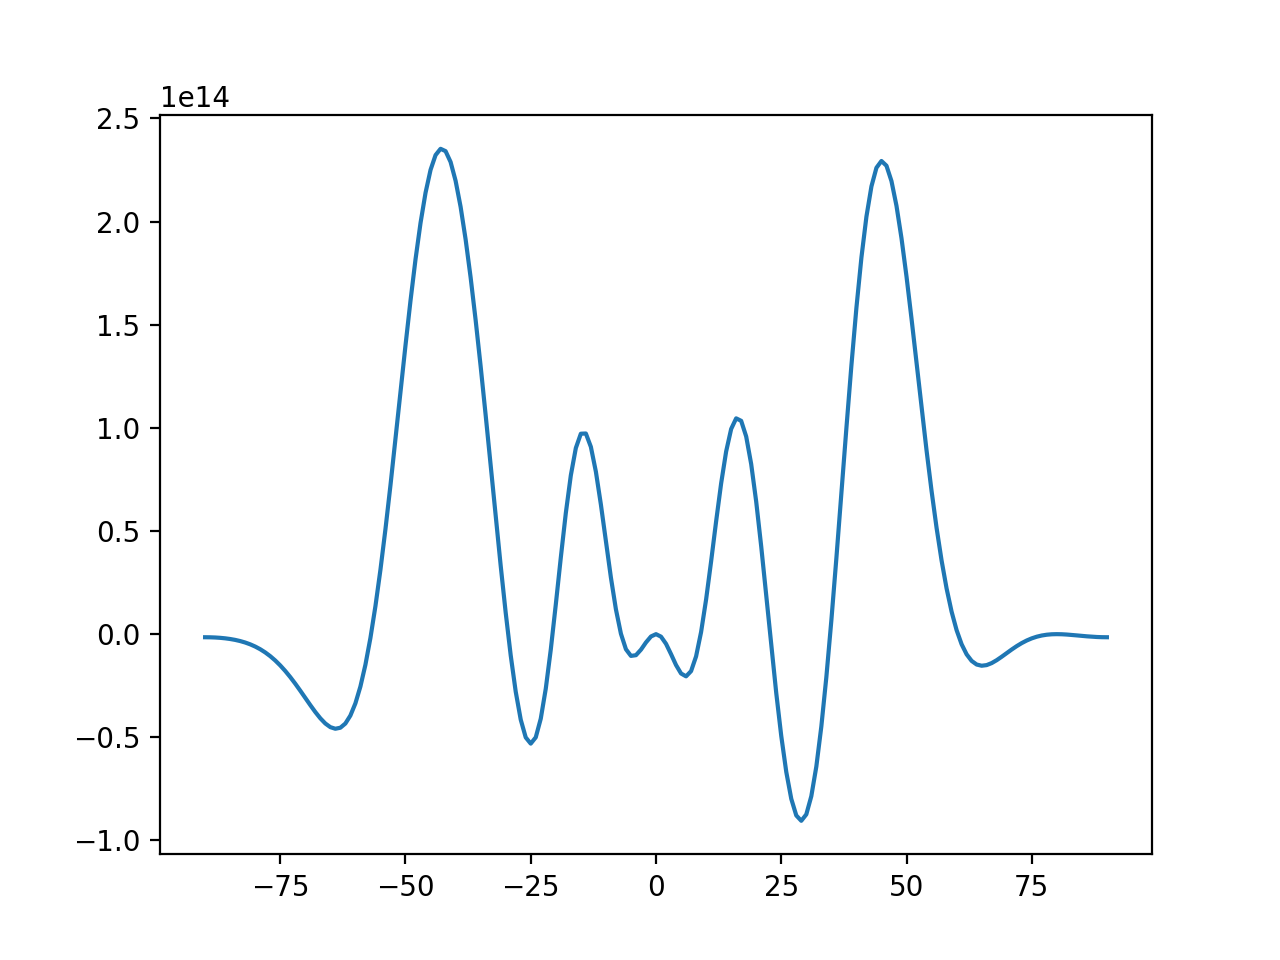

In [145]:
#Je suis censé ploté le E(A^2)
plt.figure()
plt.plot(180*theta/np.pi,SNR)

TypeError: unsupported operand type(s) for /: 'int' and 'list'